In [2]:
import backtrader as bt
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
%matplotlib inline

In [3]:
cerebro = bt.Cerebro()

In [4]:
df = yf.download('AAPL', start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [5]:
feed = bt.feeds.PandasData(dataname=df)

In [55]:
cerebro.adddata(feed)

In [37]:
# add a strategy
class SmaCross(bt.Strategy):
    def __init__(self):
        sma1 = bt.ind.SMA(period=50)  # fast moving average
        sma2 = bt.ind.SMA(period=100)  # slow moving average
        self.crossover = bt.ind.CrossOver(sma1, sma2)  # crossover signal

    def next(self):
        if not self.position:  # not in the market
            if self.crossover > 0:  # if fast crosses slow to the upside
                self.buy()  # enter long

        elif self.crossover < 0:  # in the market & cross to the downside
            self.close()  # close long position

In [38]:
cerebro.addstrategy(SmaCross)  # Add the trading strategy

0

In [39]:
cerebro.run()

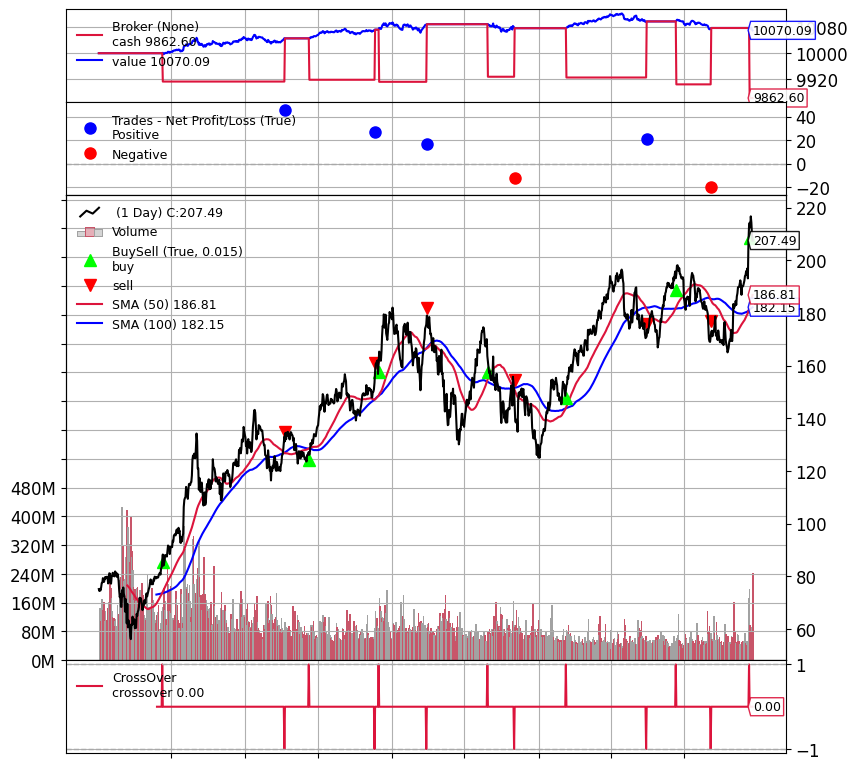

[[<Figure size 800x800 with 5 Axes>]]

In [41]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

In [46]:
# Simple Moving Average
class SMA(bt.Strategy):
    params = (
        ('period', 20),  # Default SMA period
    )

    def __init__(self):
        self.sma = bt.indicators.SimpleMovingAverage(
            self.data.close,
            period=self.params.period
        )

    def next(self):
        if not self.position:  # Not in the market
            if self.data.close[0] > self.sma[0]:
                self.buy()
        else:  # In the market
            if self.data.close[0] < self.sma[0]:
                self.sell()

In [47]:
cerebro.addstrategy(SMA)  # Add the trading strategy

0

In [48]:
cerebro.run()

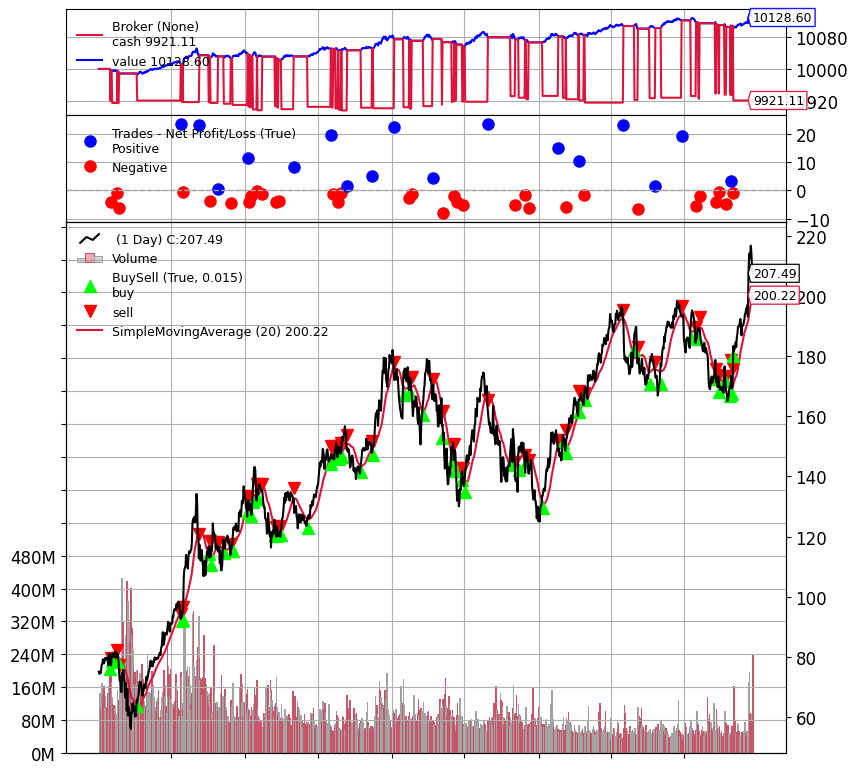

[[<Figure size 800x800 with 4 Axes>]]

In [49]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

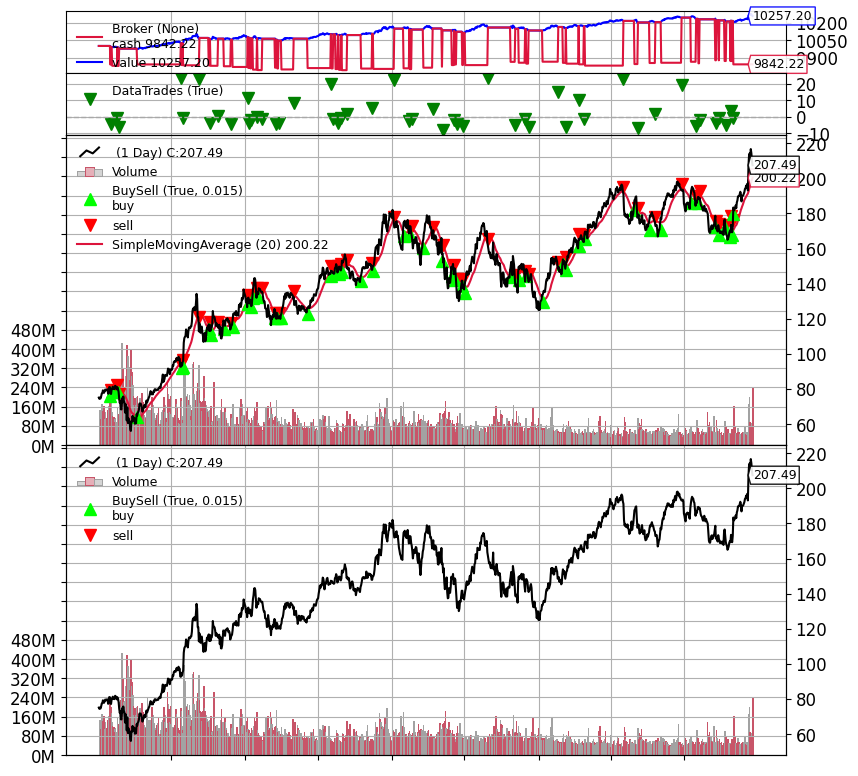

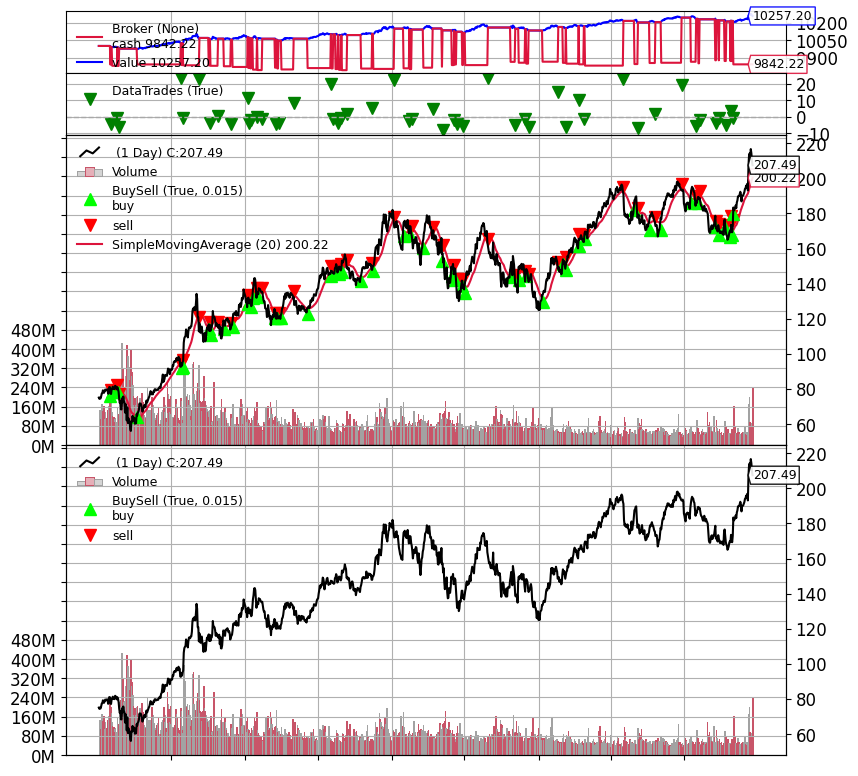

[[<Figure size 800x800 with 6 Axes>], [<Figure size 800x800 with 6 Axes>]]

In [52]:
cerebro.addstrategy(EMA)  # Add the trading strategy
cerebro.run()
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

In [53]:
# Exponential Moving Average
class EMA(bt.Strategy):
    params = (
        ('period', 20),  # Default EMA period
    )

    def __init__(self):
        self.ema = bt.indicators.ExponentialMovingAverage(
            self.data.close,
            period=self.params.period
        )

    def next(self):
        if not self.position:  # Not in the market
            if self.data.close[0] > self.ema[0]:
                self.buy()
        else:  # In the market
            if self.data.close[0] < self.ema[0]:
                self.sell()

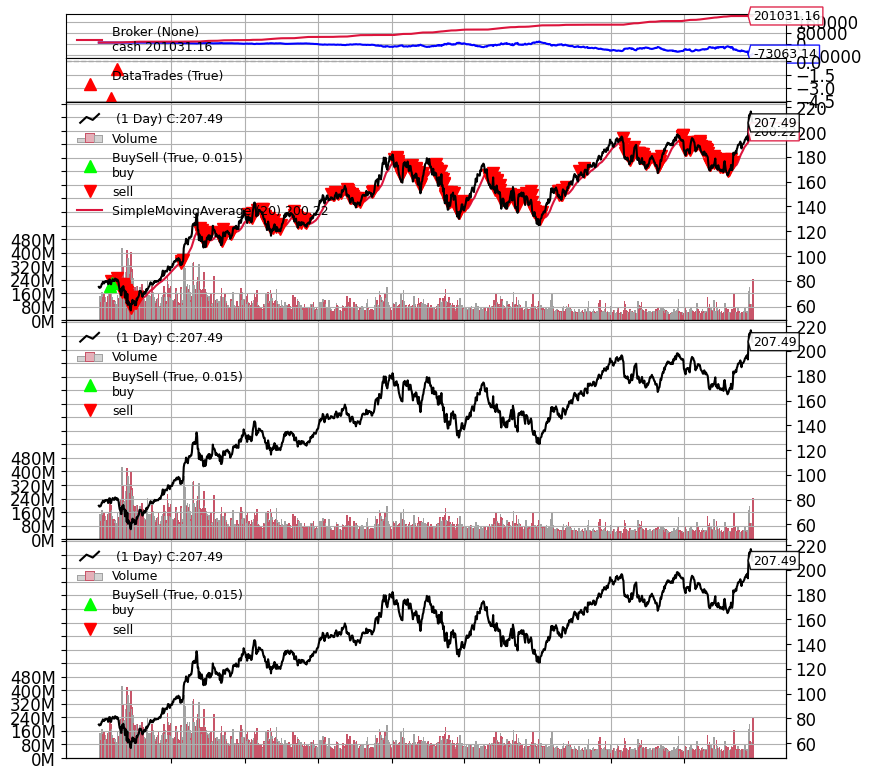

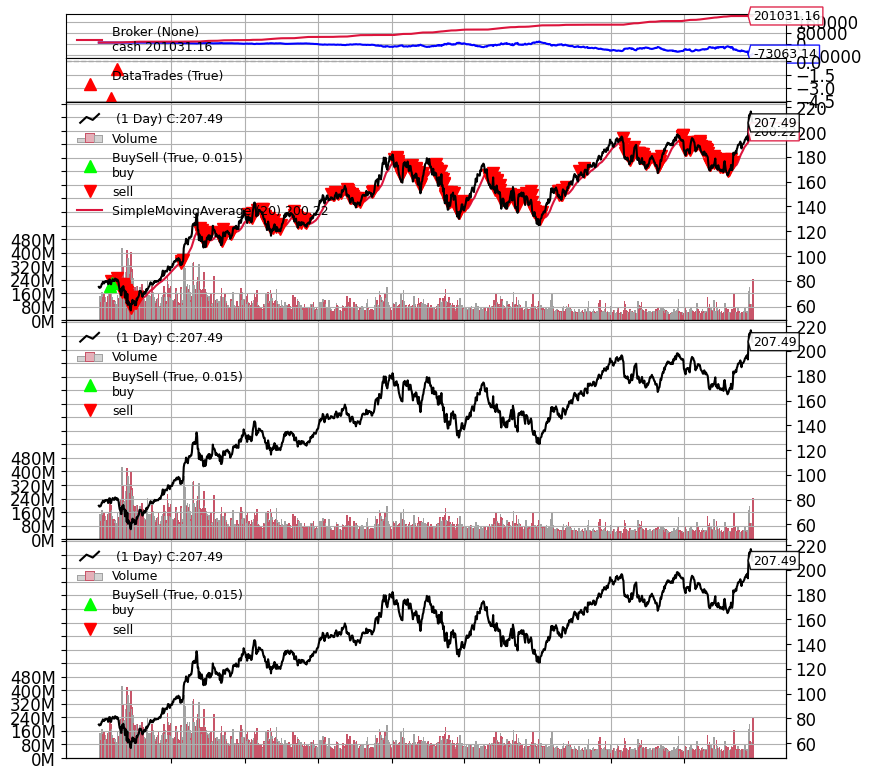

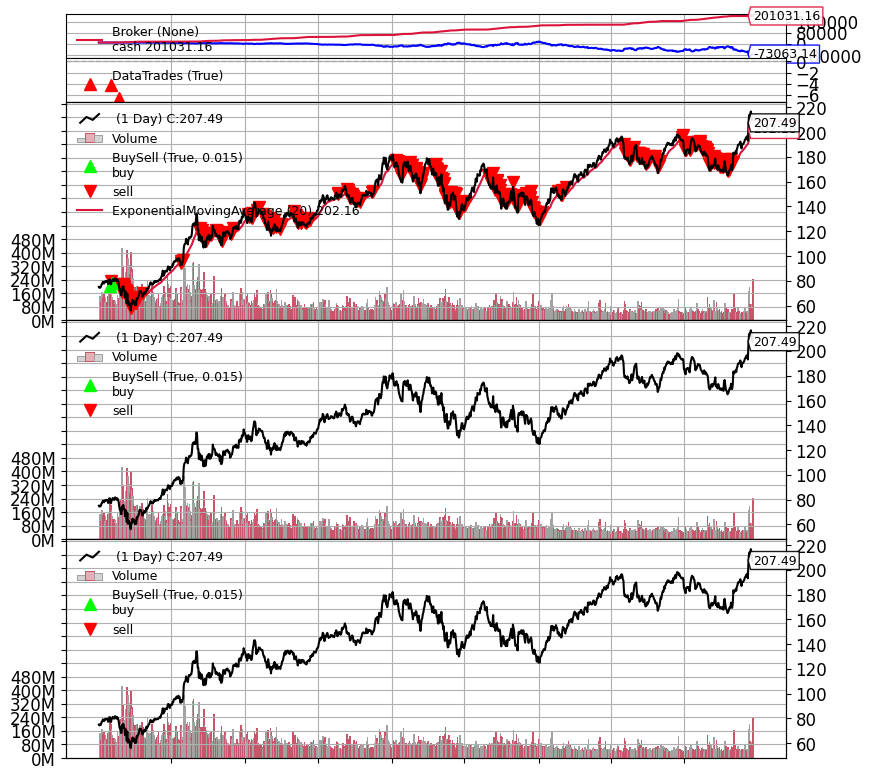

[[<Figure size 800x800 with 8 Axes>],
 [<Figure size 800x800 with 8 Axes>],
 [<Figure size 800x800 with 8 Axes>]]

In [56]:
cerebro.addstrategy(EMA)  # Add the trading strategy
cerebro.run()
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

In [ ]:
# Relative Strength Index (RSI)
class RSIStrategy(bt.Strategy):
    params = (
        ('period', 14),  # RSI period
        ('overbought', 70),  # Overbought level
        ('oversold', 30),  # Oversold level
    )

    def __init__(self):
        self.rsi = bt.indicators.RSI(
            self.data.close,
            period=self.params.period
        )

    def next(self):
        if not self.position:  # Not in the market
            if self.rsi[0] < self.params.oversold:
                self.buy()
        else:  # In the market
            if self.rsi[0] > self.params.overbought:
                self.sell()

In [41]:

class MACDStrategy(bt.Strategy):
    params = (
        ('fast_period', 12),  # Fast EMA period
        ('slow_period', 26),  # Slow EMA period
        ('signal_period', 9),  # Signal line period
    )

    def __init__(self):
        self.macd = bt.indicators.MACD(
            self.data.close,
            period_me1=self.params.fast_period,
            period_me2=self.params.slow_period,
            period_signal=self.params.signal_period
        )

    def next(self):
        if not self.position:  # Not in the market
            if self.macd.macd[0] > self.macd.signal[0] and self.macd.macd[-1] <= self.macd.signal[-1]:
                self.buy()
        else:  # In the market
            if self.macd.macd[0] < self.macd.signal[0] and self.macd.macd[-1] >= self.macd.signal[-1]:
                self.sell()

In [42]:
cerebro.addstrategy(MACDStrategy)  # Add the trading strategy

0

In [33]:
cerebro.addstrategy(EMA)  # Add the trading strategy

1

In [19]:
cerebro.addstrategy(SMA)  # Add the trading strategy

0

In [7]:
cerebro.addstrategy(SmaCross)  # Add the trading strategy

0

In [11]:
cerebro.run()

AttributeError: 'int' object has no attribute 'to_pydatetime'

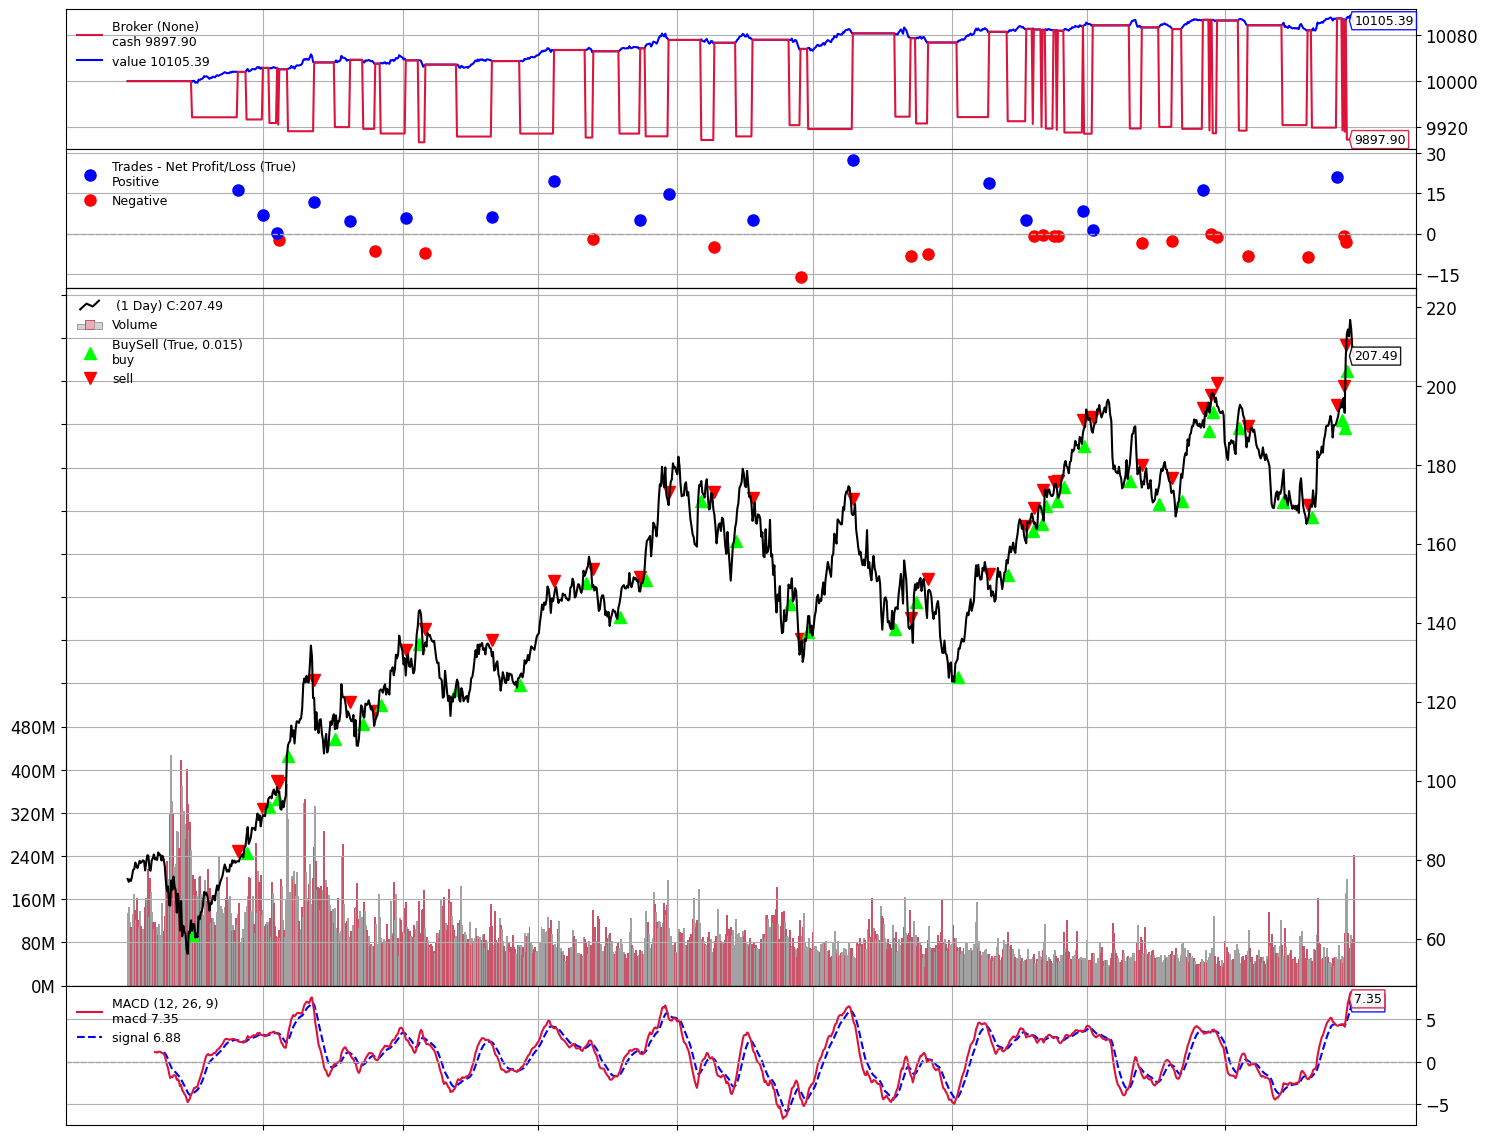

[[<Figure size 1500x1200 with 5 Axes>]]

In [44]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams.update({'font.size': 12}) 
cerebro.plot(iplot = False)

In [50]:
class MACDStrategy(bt.Strategy):
    params = (
        ('fast_period', 12),
        ('slow_period', 26),
        ('signal_period', 9),
    )

    def __init__(self):
        self.macd = bt.indicators.MACD(
            self.data.close,
            period_me1=self.params.fast_period,
            period_me2=self.params.slow_period,
            period_signal=self.params.signal_period
        )
        self.order = None
        self.trades = 0
        self.winning_trades = 0
        self.losing_trades = 0

    def next(self):
        if not self.position:
            if self.macd.macd[0] > self.macd.signal[0] and self.macd.macd[-1] <= self.macd.signal[-1]:
                self.order = self.buy()
                self.trades += 1
        else:
            if self.macd.macd[0] < self.macd.signal[0] and self.macd.macd[-1] >= self.macd.signal[-1]:
                self.order = self.sell()
                self.trades += 1

    def notify_trade(self, trade):
        if trade.isclosed:
            if trade.pnl > 0:
                self.winning_trades += 1
            else:
                self.losing_trades += 1

In [51]:
cerebro.addstrategy(MACDStrategy)  # Add the trading strategy

0

In [52]:
cerebro.run()